### Random Forest Regression vs. Gradient Tree Boosting

In [21]:
# import packages 

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset 

df = pd.read_csv("cleanedData.csv")
df.head(10)

,ID,IUCR,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Date,Time,Month,Day,DayofWeek,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,INDEX CODE
0,5223506,2825,RESIDENCE,False,True,2122,2.0,26,2007,2007-01-03,10:00:00,Jan,3,Wednesday,OTHER OFFENSE,HARASSMENT BY TELEPHONE,N
1,5224416,1320,STREET,False,False,1323,12.0,14,2007,2007-01-04,18:00:00,Jan,4,Thursday,CRIMINAL DAMAGE,TO VEHICLE,N
2,5224520,5002,STREET,True,False,111,1.0,26,2007,2007-01-05,09:30:00,Jan,5,Friday,OTHER OFFENSE,OTHER VEHICLE OFFENSE,N
3,5225556,1320,STREET,False,False,111,1.0,14,2007,2007-01-05,19:00:00,Jan,5,Friday,CRIMINAL DAMAGE,TO VEHICLE,N
4,5227933,2024,STREET,True,False,2323,19.0,18,2007,2007-01-04,14:50:00,Jan,4,Thursday,NARCOTICS,POSS: HEROIN(WHITE),N
5,5227797,2094,SIDEWALK,True,False,1532,15.0,18,2007,2007-01-05,11:35:00,Jan,5,Friday,NARCOTICS,ATTEMPT POSSESSION CANNABIS,N
6,5242118,1811,STREET,True,False,2422,24.0,18,2007,2007-01-07,13:00:00,Jan,7,Sunday,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,N
7,5242417,0460,SIDEWALK,False,False,726,7.0,08B,2007,2007-01-13,01:39:10,Jan,13,Saturday,BATTERY,SIMPLE,U
8,5243014,0460,FACTORY/MANUFACTURING BUILDING,False,False,925,9.0,08B,2007,2007-01-13,09:00:00,Jan,13,Saturday,BATTERY,SIMPLE,U
9,5243687,0850,FACTORY/MANUFACTURING BUILDING,False,False,925,9.0,06,2007,2007-01-14,02:50:16,Jan,14,Sunday,THEFT,ATTEMPT THEFT,U


In [7]:
# run Random Forest Regression 
df.dtypes
hours = pd.to_datetime(df['Time']).dt.hour
hours.head(10)


0    10
1    18
2     9
3    19
4    14
5    11
6    13
7     1
8     9
9     2
Name: Time, dtype: int64

In [26]:
# Label Encoding categorical data 
newDf = df.copy()
newDf.drop(['ID', 'Time'], axis = 1, inplace = True)
newDf['Hours'] = hours

# all categorical data
categories = ['IUCR','Location Description','Arrest',
           'FBI Code', 'Domestic', 'Month', 'DayofWeek',
           'PRIMARY DESCRIPTION', 'SECONDARY DESCRIPTION', 'INDEX CODE', 'Hours']
encoders = {}

for i in categories:
    # Create a label (category) encoder object
    encoders[i] = preprocessing.LabelEncoder()

    # Fit the encoder to the pandas column
    encoders[i].fit(newDf[i])
    
    # View the labels (if you want)
    #list(le.classes_)
    
    # Apply the fitted encoder to the pandas column
    trans = encoders[i].transform(newDf[i]) 
    
    # Append to DataFrame
    newName = i + '_encoded'
    newDf.loc[:, newName] = pd.Series(trans, index = newDf.index)

newDf.describe()

,Beat,District,Year,Day,Hours,IUCR_encoded,Location Description_encoded,Arrest_encoded,FBI Code_encoded,Domestic_encoded,Month_encoded,DayofWeek_encoded,PRIMARY DESCRIPTION_encoded,SECONDARY DESCRIPTION_encoded,INDEX CODE_encoded,Hours_encoded
count,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06,3.423496e+06
mean,1.181222e+03,1.130010e+01,2.010991e+03,1.564463e+01,1.315196e+01,1.257202e+02,1.061124e+02,2.700856e-01,1.211051e+01,1.383998e-01,5.576326e+00,2.982576e+00,1.423277e+01,2.029977e+02,1.553849e+00,1.315196e+01
std,7.002026e+02,6.926531e+00,2.841988e+00,8.829594e+00,6.717154e+00,8.506388e+01,4.512038e+01,4.440039e-01,6.568510e+00,3.453191e-01,3.460171e+00,2.019707e+00,1.124264e+01,1.090440e+02,5.534576e-01,6.717154e+00
min,1.110000e+02,1.000000e+00,2.007000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.210000e+02,6.000000e+00,2.008000e+03,8.000000e+00,9.000000e+00,7.600000e+01,8.500000e+01,0.000000e+00,7.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.300000e+02,1.000000e+00,9.000000e+00
50%,1.032000e+03,1.000000e+01,2.011000e+03,1.600000e+01,1.400000e+01,9.400000e+01,1.210000e+02,0.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,3.000000e+00,1.600000e+01,2.420000e+02,2.000000e+00,1.400000e+01
75%,1.723000e+03,1.700000e+01,2.013000e+03,2.300000e+01,1.900000e+01,1.550000e+02,1.410000e+02,1.000000e+00,1.600000e+01,0.000000e+00,9.000000e+00,5.000000e+00,2.700000e+01,3.010000e+02,2.000000e+00,1.900000e+01
max,2.535000e+03,3.100000e+01,2.016000e+03,3.100000e+01,2.300000e+01,3.850000e+02,1.560000e+02,1.000000e+00,2.500000e+01,1.000000e+00,1.100000e+01,6.000000e+00,3.100000e+01,3.630000e+02,2.000000e+00,2.300000e+01


,Arrest,Domestic,Beat,District,Year,Day,Hours,IUCR_encoded,Location Description_encoded,Arrest_encoded,FBI Code_encoded,Domestic_encoded,Month_encoded,DayofWeek_encoded,PRIMARY DESCRIPTION_encoded,SECONDARY DESCRIPTION_encoded,INDEX CODE_encoded,Hours_encoded
Arrest,1.000000,-0.067204,-0.022398,-0.019107,-0.032576,-0.000739,0.088836,0.360453,0.037685,1.000000,0.389525,-0.067204,-0.006164,0.013254,0.023093,0.195666,-0.245216,0.088836
Domestic,-0.067204,1.000000,-0.043635,-0.041463,0.039201,-0.000403,-0.032560,-0.092023,-0.173548,-0.067204,0.014134,1.000000,-0.007389,-0.008226,-0.260474,-0.117564,0.126900,-0.032560
Beat,-0.022398,-0.043635,1.000000,0.955455,-0.032835,-0.001028,-0.012246,0.004587,0.016277,-0.022398,-0.008005,-0.043635,0.000413,-0.007906,0.039693,-0.001622,0.021951,-0.012246
District,-0.019107,-0.041463,0.955455,1.000000,-0.003835,-0.000951,-0.012674,0.005900,0.019156,-0.019107,-0.006370,-0.041463,0.000737,-0.008135,0.035361,-0.001012,0.018611,-0.012674
Year,-0.032576,0.039201,-0.032835,-0.003835,1.000000,0.001093,0.006844,-0.032584,-0.026717,-0.032576,-0.033159,0.039201,-0.004227,-0.003604,0.009906,-0.046992,0.012712,0.006844
Day,-0.000739,-0.000403,-0.001028,-0.000951,0.001093,1.000000,0.016261,-0.009353,0.002787,-0.000739,-0.008404,-0.000403,0.003395,-0.000335,-0.004819,0.002312,0.005476,0.016261
Hours,0.088836,-0.032560,-0.012246,-0.012674,0.006844,0.016261,1.000000,0.060034,0.040630,0.088836,0.060187,-0.032560,0.002139,0.008238,0.030308,0.049960,-0.031730,1.000000
IUCR_encoded,0.360453,-0.092023,0.004587,0.005900,-0.032584,-0.009353,0.060034,1.000000,0.066033,0.360453,0.866689,-0.092023,-0.010969,0.009607,0.203480,0.305674,-0.616860,0.060034
Location Description_encoded,0.037685,-0.173548,0.016277,0.019156,-0.026717,0.002787,0.040630,0.066033,1.000000,0.037685,0.035904,-0.173548,0.009805,0.003987,0.118777,0.000508,-0.064202,0.040630
Arrest_encoded,1.000000,-0.067204,-0.022398,-0.019107,-0.032576,-0.000739,0.088836,0.360453,0.037685,1.000000,0.389525,-0.067204,-0.006164,0.013254,0.023093,0.195666,-0.245216,0.088836


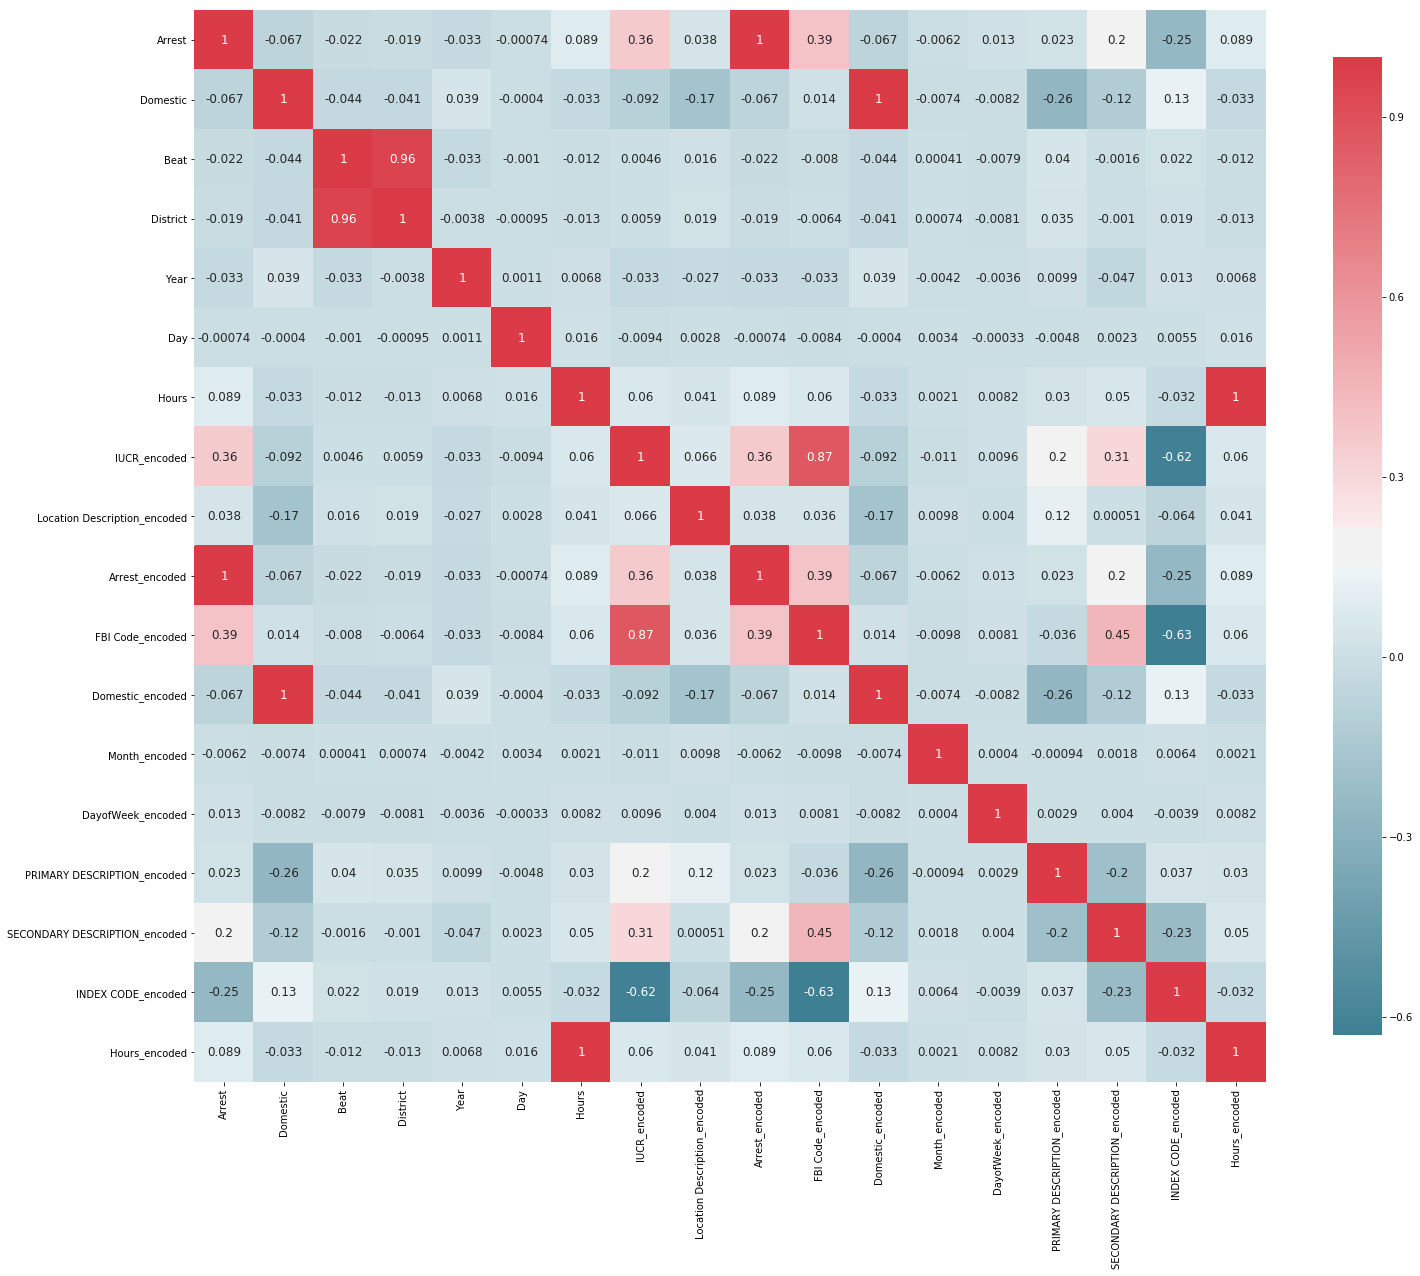

In [27]:
def plot_correlation_map(df):
    """
    This function plots the correlation map of a given dataframe
    """
    corr = df.corr()
    _ , ax = plt.subplots( figsize =(24, 20 ) )
    cmap = sns.diverging_palette(220, 10, as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


plot_correlation_map(newDf)
newDf.corr()